## Importing Data and Cleaning

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

wk2 = pd.read_csv('Intermediate-Data/Week_2_data.csv')
stemr = pd.read_csv('Intermediate-Data/FUllyMergedDataset.csv')
idkey = pd.read_csv('Intermediate-Data/ID Key-6-3-18.csv')
idkey2 = pd.read_csv('Intermediate-Data/username to id.csv')
idkey = idkey.rename(columns ={'ID':'AnonID'})
idkey2 = idkey2.rename(columns ={'Student Id':'AnonID'})



C:\Users\Cabot\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31,77,79,80,83,85,86,138,146,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,226,227,266,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,311,313,316) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Cabot\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (64,113,118,150,156,161,193,267,316,317,456,458,503,572,605,607,648,649,651,653,658,660,662,664,673,674,719,720,722,723,724,725,800,801,804,805,806,808,809,810,811,812,813,814,815,816,817,828,829,830,831,83

In [23]:
len(wk2)

1282

In [24]:
wk2['SBonus1'].fillna(0,inplace = True)

In [25]:
mathgrdstr = ['M126FirstGrade2','M128FirstGrade2','M129FirstGrade2','M153FirstGrade2','M154FirstGrade2',
             'M155FirstGrade2','M156FirstGrade2']
mathstr = ['M126ClassStr','M128ClassStr','M129ClassStr','M153ClassStr','M154ClassStr',
             'M155ClassStr','M156ClassStr']


In [27]:

for n in range(0,len(mathstr)):
    stemr[mathgrdstr[n]] = stemr[mathstr[n]].astype(str).str[0]


In [28]:
stemr['P111FirstGrade'] = stemr['P111FirstGrade'].astype(str).str[0]
stemr['Cal1FirstGrade'] = stemr['Cal1FirstGrade'].astype(str).str[0]

In [29]:
stemr2 = stemr[[    'AnonID',
                    'High.School.GPA',
                    'ACTSATMathPercentile',
                    'ACTSATVerbalPercentile',
                    'Sem1GPA','P111FirstGrade','Cal1FirstGrade','P112FirstGrade'   ]]


In [30]:
stemr3 = pd.merge(stemr2,idkey2, on = 'AnonID')

In [31]:
data = pd.merge(wk2, stemr3, on = 'Username')
data = pd.merge(data, survey, on = 'Username')


In [32]:
data = data[pd.notnull(data['P112FirstGrade'])]
data['P112FirstGrade1'] = data.loc[:,'P112FirstGrade'].astype(str).str[0]

data["FinalCourseGradeAB_Rest1"] = np.where(data['P112FirstGrade1'] == "A",1,0)
data["FinalCourseGradeAB_Rest1"] = np.where(data['P112FirstGrade1'] == "B",1,data['FinalCourseGradeAB_Rest1'])

data['Cal1FirstGradeNUM'] = 0

data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "A",4,0)
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "B",3,data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "C",2,data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "D",1,data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "W",-1,data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "n",data['Sem1GPA'].round(1),data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "P",data['Sem1GPA'].round(1),data['Cal1FirstGradeNUM'])

data['P111FirstGradeNUM'] = 0

data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "A",4,0)
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "B",3,data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "C",2,data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "D",1,data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "W",-1,data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "n",data['Sem1GPA'].round(1),data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "P",data['Sem1GPA'].round(1),data['P111FirstGradeNUM'])

In [33]:
data['TakeCSEM'] = np.where(data['TakeCSEM'] == "Y", 1,0)

In [34]:
data['High.School.GPA'] = pd.to_numeric(data['High.School.GPA'], errors = "coerce")
data['TakeCSEM'] = pd.to_numeric(data['TakeCSEM'], errors = "coerce")
data2 = data[pd.notnull(data['High.School.GPA'])]
data2 = data2[pd.notnull(data2['ACTSATMathPercentile'])]
data2 = data2[pd.notnull(data2['ACTSATVerbalPercentile'])]
data2 = data2[pd.notnull(data2['Sem1GPA'])]

In [35]:
data2.columns[data2.isnull().any()].tolist()

['LabQ1',
 'Lab2',
 'LabQ2',
 'FHwk2',
 'LecQ1',
 'LecQ5',
 'Lab2Miss',
 'Lec1Miss',
 'Lec5Miss']

In [36]:
wk2 = data2

In [37]:
wk2 = pd.DataFrame(wk2)


In [38]:
wk2.columns[wk2.isnull().any()].tolist()
wk2['LabQ1'].fillna(0,inplace = True)
lecmis = ['Lec1Miss','Lec2Miss','Lec3Miss']
wk2['MissedLectures'] = wk2[lecmis].sum(axis = 1)
wk2['MissedAnyLectures'] = np.where(wk2['MissedLectures'] > 0, 1,0)

In [39]:
wk2['LabQ1'].fillna(0,inplace = True)
# Replace na values by column in dataframe

In [40]:
pd.crosstab(index = wk2['LecQ1'], columns = "count")

col_0,count
LecQ1,
0.0,35
2.0,293


## Making New Columns For Analysis

In [41]:
import re

regLecMis = re.compile(".*(Lec)\d(Miss).*")
lecmis = [m.group(0) for l in list(wk2) for m in[regLecMis.search(l)] if m]

In [42]:
wk2['MissedLectures'] = wk2[lecmis].sum(axis = 1, skipna = True)
#Sum over the missed lectures

In [43]:
wk2['MissedAnyLectures'] = np.where(wk2['MissedLectures'] > 0, 1,0)


22      1
23      1
24      1
25      1
115     1
116     1
117     1
118     1
171     1
172     1
173     1
174     1
202     1
203     1
204     1
205     1
235     1
236     1
237     1
238     1
252     1
253     1
273     1
274     1
275     1
276     1
277     1
278     1
279     0
280     0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
1309    0
1310    0
1311    0
1312    0
1313    0
1314    0
1315    0
1316    0
1317    0
1318    0
1319    0
1320    0
1321    0
1322    0
1323    0
1324    0
1325    0
1326    0
1327    0
1328    0
1329    0
1330    0
1331    0
1332    0
1333    0
Name: TakeCSEM, Length: 601, dtype: int32

In [44]:
regex = re.compile(".*(LecQ).")
regLabQ = re.compile(".*(LabQ).")
regLab1 = re.compile(".*(Lab)\d.*")
regLab2 = re.compile("^\w{4,4}$")
regHw = re.compile(".*(FHwk).")
#Define what we want out of the string

lecQs = [m.group(0) for l in list(wk2) for m in[regex.search(l)] if m]
#Creates a list "lecQs" for all of the instances of Lecture Quiz http://www.cademuir.eu/blog/2011/10/20/python-searching-for-a-string-within-a-list-list-comprehension/
labQs = [m.group(0) for l in list(wk2) for m in[regLabQ.search(l)] if m]
labs = [m.group(0) for l in list(wk2) for m in[regLab1.search(l)] if m]
labs = [m.group(0) for l in list(labs) for m in[regLab2.search(l)] if m]
Fhwks = [m.group(0) for l in list(wk2) for m in[regHw.search(l)] if m]

In [45]:
wk2[lecQs] = np.where(wk2[lecQs] < 0, 0,wk2[lecQs])
wk2['LecQGrade'] = wk2[lecQs].mean(axis = 1, skipna = True)
#LecQAve
wk2['LabQGrade'] = wk2[labQs].mean(axis = 1, skipna = True)
wk2['HWGrade'] = wk2[Fhwks].mean(axis = 1, skipna = True)

In [46]:
wk2[labs] = np.where(wk2[labs] < 0, 0,wk2[labs])
#wk2 = pd.concat([wk2, pd.get_dummies(wk2['LectureSection'],prefix = "LectureSection")], axis = 1)
wk2 = pd.concat([wk2, pd.get_dummies(wk2['LabDay'],prefix = "LD")], axis = 1)

In [48]:
list(wk2)

['Unnamed: 0',
 'Username',
 'LectureSection',
 'LabSection',
 'CourseAveNoDrop',
 'TstAve',
 'Lab1',
 'LabQ1',
 'CSEMPretestPercent',
 'Lab2',
 'LabQ2',
 'SBonus1',
 'FinalCourseGrade',
 'FHwk1',
 'FHwk2',
 'LecQ1',
 'LecQ2',
 'LecQ3',
 'LecQ4',
 'LecQ5',
 'LecQ6',
 'LabDay',
 'LabTime',
 'FinalCourseGrade2',
 'FinalCourseGradePF',
 'FinalCourseGradeAB_C_DF',
 'FinalCourseGradeAB_Rest',
 'TakeCSEM',
 'Lab1Miss',
 'Lab2Miss',
 'DidFHwk1',
 'DidFHwk2',
 'Lec1Miss',
 'Lec2Miss',
 'Lec3Miss',
 'Lec4Miss',
 'Lec5Miss',
 'Lec6Miss',
 'AnonID',
 'High.School.GPA',
 'ACTSATMathPercentile',
 'ACTSATVerbalPercentile',
 'Sem1GPA',
 'P111FirstGrade',
 'Cal1FirstGrade',
 'P112FirstGrade',
 'IsFall',
 'IsHonors',
 'Classification',
 'TAexperience',
 'P112FirstGrade1',
 'FinalCourseGradeAB_Rest1',
 'Cal1FirstGradeNUM',
 'P111FirstGradeNUM',
 'MissedLectures',
 'MissedAnyLectures',
 'LecQGrade',
 'LabQGrade',
 'HWGrade',
 'LD_F',
 'LD_M',
 'LD_R',
 'LD_T',
 'LD_W']

# Optimal Model Class Dataset

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = [ 'LecQGrade', 'LabQGrade', 'HWGrade',
 'MissedLectures',
 'MissedAnyLectures',
 'SBonus1']

X = wk2[names2]
Y = wk2.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [50]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [51]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

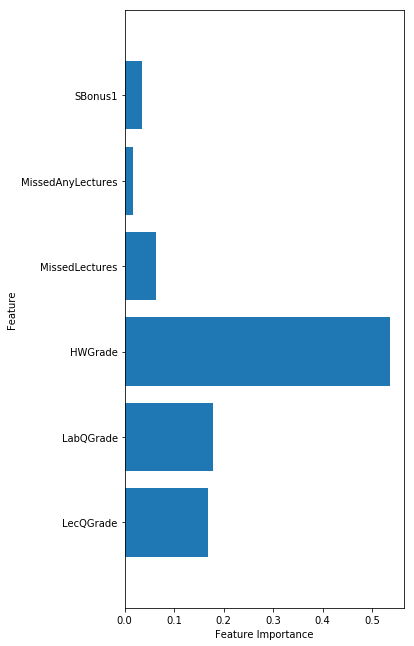

In [52]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [53]:
prediction = forest.predict(Xtest)

In [54]:
BLmeanAcc = 0.545191011236

In [55]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.7513812154696132


In [56]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.20619020423361323


In [57]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.48025014357730844


### Remove MissAnyLectures *** Optimal

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = [ 'LecQGrade', 'LabQGrade', 'HWGrade',
 'MissedLectures',
 'SBonus1']

X = wk2[names2]
Y = wk2.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [59]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [60]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

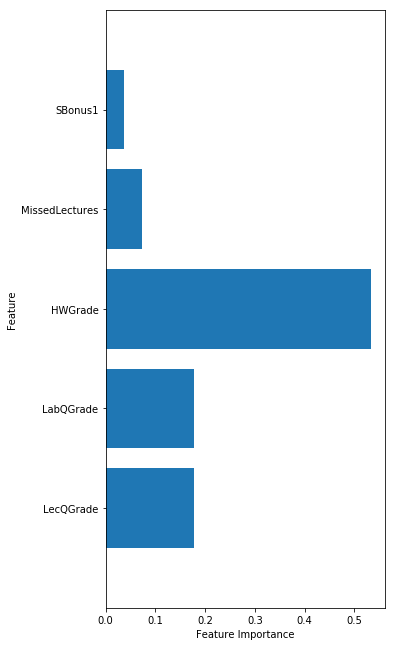

In [61]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [62]:
prediction = forest.predict(Xtest)

In [63]:
BLmeanAcc = 0.545191011236

In [64]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.7513812154696132


In [65]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.20619020423361323


In [66]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.48025014357730844


### Remove Survey Bonus

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = [ 'LecQGrade', 'LabQGrade', 'HWGrade',
 'MissedLectures']

X = wk2[names2]
Y = wk2.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [68]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [69]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

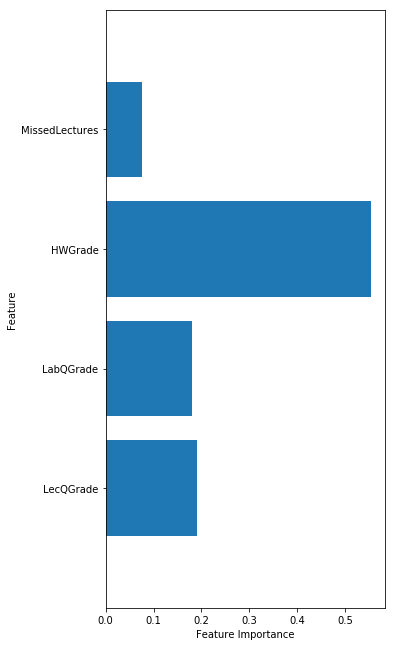

In [70]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [71]:
prediction = forest.predict(Xtest)

In [72]:
BLmeanAcc = 0.545191011236

In [73]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.7237569060773481


In [74]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.1785658948413481


In [75]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.4188286668379142


### Cut at 0.01

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = [ 'LecQGrade', 'LabQGrade', 'HWGrade']

X = wk2[names2]
Y = wk2.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [77]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [78]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

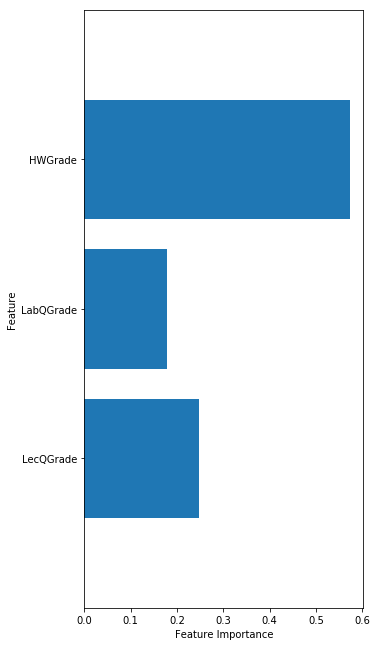

In [79]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [80]:
prediction = forest.predict(Xtest)

In [81]:
BLmeanAcc = 0.545191011236

In [82]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.7403314917127072


In [83]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.19514048047670718


In [84]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.45485421339314325


### Just HW grade

In [85]:
logreg = LogisticRegression()
X2 = Xtrain['HWGrade']
X3 = Xtest['HWGrade']

In [86]:
X2 = pd.DataFrame(X2)
X3 = pd.DataFrame(X3)

In [87]:
logreg.fit(X2, Ytrain.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
predictions = logreg.predict(X3)

In [89]:
accuracy_score(Ytest, predictions)

0.7071823204419889

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = ['HWGrade']

X = wk2[names2]
Y = wk2.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [91]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [92]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

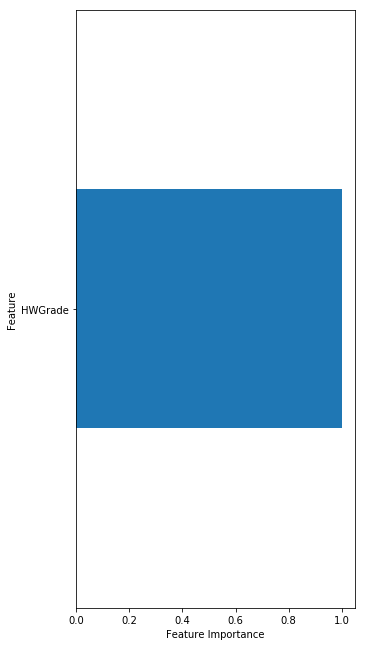

In [93]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [94]:
prediction = forest.predict(Xtest)

In [95]:
BLmeanAcc = 0.545191011236

In [96]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.6740331491712708


In [97]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.12884213793527077


In [98]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.3068734990588693


## Layered Model with Demo-Variables

In [99]:
from sklearn.model_selection import train_test_split


names = [ 'LecQGrade', 'LabQGrade', 'HWGrade',
 'MissedLectures',
 'SBonus1',"High.School.GPA","ACTSATMathPercentile","ACTSATVerbalPercentile","Sem1GPA",
'P111FirstGradeNUM',"Cal1FirstGradeNUM"]

wk2['FinalCourseGradeAB_Rest1'] = np.where(wk2['FinalCourseGradeAB_Rest'] == "AB", 1,0)
#X = wk2.drop('FinalCourseGradeAB_Rest', axis = 1)
X = wk2[names]
Y = wk2.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)


print(Xtrain.dtypes)

LecQGrade                 float64
LabQGrade                 float64
HWGrade                   float64
MissedLectures            float64
SBonus1                   float64
High.School.GPA           float64
ACTSATMathPercentile      float64
ACTSATVerbalPercentile    float64
Sem1GPA                   float64
P111FirstGradeNUM         float64
Cal1FirstGradeNUM         float64
dtype: object


### Evaluation of Best ML Algorithm

In [100]:
seed = 416
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#models.append(('KMeans',KMeans()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
results2 = []
results3 = []
results4 = []
names = []
names2 = []
names3 = []
names4 = []
scoring = 'accuracy'


for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtrain, Ytrain.values.ravel(), cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

for name2, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtest, Ytest.values.ravel(), cv=kfold, scoring=scoring)
	results2.append(cv_results)
	names2.append(name2)
	msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
	print(msg)

from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)

for name3, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtest, Ytest.values.ravel(), cv=kfold, scoring=kappa_scorer)
	results3.append(cv_results)
	names3.append(name3)
	msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
	print(msg)

for name4, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtest, Ytest.values.ravel(), cv=kfold, scoring=kappa_scorer)
	results4.append(cv_results)
	names4.append(name4)
	msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.807143 (0.060656)
LDA: 0.811905 (0.072570)
KNN: 0.726190 (0.070026)
CART: 0.809524 (0.078967)
NB: 0.785714 (0.059285)
SVM: 0.745238 (0.078282)
RF: 0.814286 (0.060045)
LR: 0.790058 (0.064683)
LDA: 0.778655 (0.075233)
KNN: 0.708187 (0.090943)
CART: 0.728947 (0.137570)
NB: 0.784211 (0.058812)
SVM: 0.685673 (0.096741)
RF: 0.817836 (0.121520)
RF: 0.526333 (0.128821)
RF: 0.497369 (0.161725)
RF: 0.310537 (0.202044)
RF: 0.406025 (0.298289)
RF: 0.503020 (0.154755)
RF: 0.178559 (0.228975)
RF: 0.588862 (0.254159)
RF: 0.526333 (0.128821)
RF: 0.497369 (0.161725)
RF: 0.310537 (0.202044)
RF: 0.455772 (0.253597)
RF: 0.503020 (0.154755)
RF: 0.178559 (0.228975)
RF: 0.602556 (0.230203)


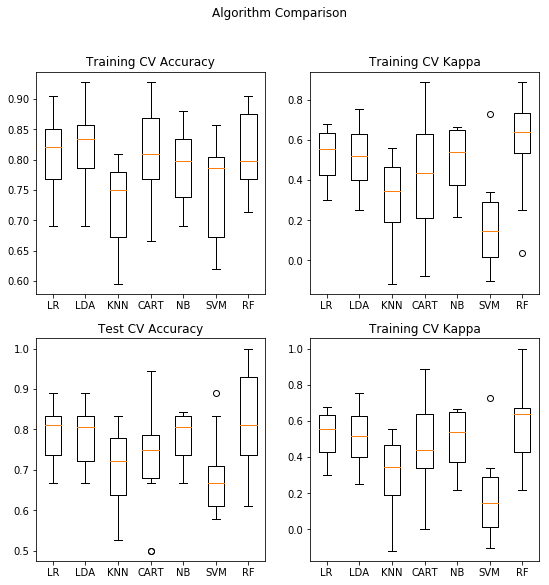

In [101]:
fig = plt.figure(figsize = (9,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(221)
plt.boxplot(results)
ax.set_xticklabels(names2)
plt.title("Training CV Accuracy")
ax = fig.add_subplot(223)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.title("Test CV Accuracy")
ax = fig.add_subplot(222)
plt.boxplot(results3)
ax.set_xticklabels(names2)
plt.title('Training CV Kappa')
ax = fig.add_subplot(224)
plt.boxplot(results4)
ax.set_xticklabels(names2)
plt.title("Training CV Kappa")
plt.show()

In [102]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

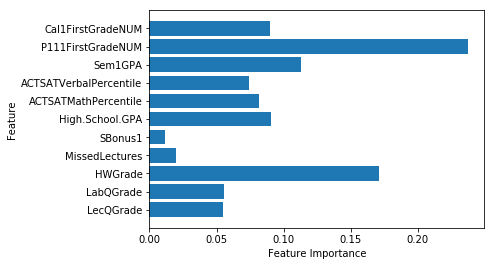

In [103]:
n_features = Xtrain.shape[1]


plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [104]:
prediction = forest.predict(Xtest)

In [105]:
names = ["High.School.GPA","ACTSATMathPercentile","ACTSATVerbalPercentile","Sem1GPA",
'P111FirstGradeNUM',"Cal1FirstGradeNUM"]

wk2['FinalCourseGradeAB_Rest1'] = np.where(wk2['FinalCourseGradeAB_Rest'] == "AB", 1,0)
#X = wk2.drop('FinalCourseGradeAB_Rest', axis = 1)
X = wk2[names]
Y = wk2.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)
demof = RandomForestClassifier(n_estimators = 10000, random_state = 416)
demof.fit(Xtrain, Ytrain.values.ravel())
pred = demof.predict(Xtest)
DemoAcc = accuracy_score(Ytest, pred)
print("Demo Baseline Accuracy: ", DemoAcc)

Demo Baseline Accuracy:  0.8066298342541437


In [106]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.8674033149171271


In [107]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.3222123036811271


In [108]:
forestAboveDemoBaseline = forestAcc - DemoAcc
print("Improvement of Adding Class Variables: ", forestAboveDemoBaseline)

Improvement of Adding Class Variables:  0.06077348066298338


In [109]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.7099358974358975
